**The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All**

This is the notebook implementation of the <b>Seaborn Tutorial</b> available on https://elitedatascience.com/python-seaborn-tutorial for getting a hands on experience on Seaborn.

Note: Only the code part is included in here. For explanations, please visit above link.


In [2]:
# Pandas for managing datasets
import pandas as pd

In [3]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Seaborn for plotting and styling
import seaborn as sns

In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

**Tip:** The argument  <i>index_col=0</i> simply means we'll treat the first column of the dataset as the ID column.

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [26]:
#df[df['Total']== df['Total'].max()]
#df[df['Legendary'] == True]
#df.Legendary.dtype

In [7]:
df.shape
#So there are all 151 Pokemons in this dataset.

(151, 12)

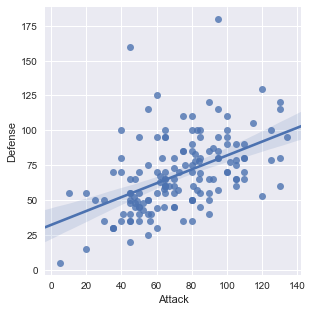

In [18]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df, aspect=1,size=4.5)
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

The arguments size and aspect gives size in inches and aspect ratio. Default is size=5(does not fit properly) and aspect = 1.

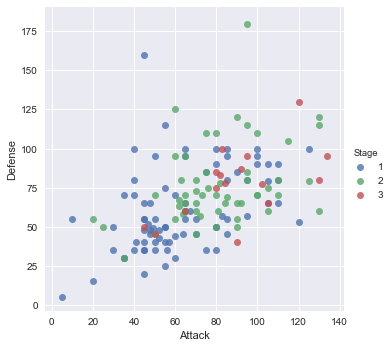

In [19]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

- Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. 
- This hue argument is very useful because it allows you to express a <b>third dimension</b> of information using color.

(0, 142.25647612435475)

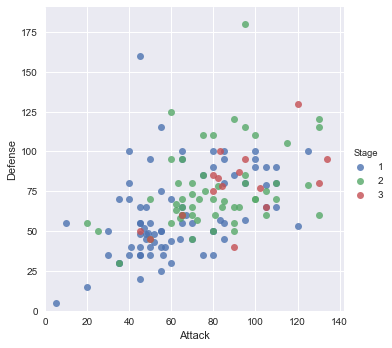

In [20]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

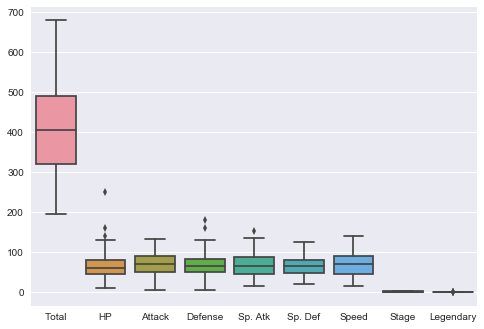

In [27]:
# Boxplot
sns.boxplot(data=df)

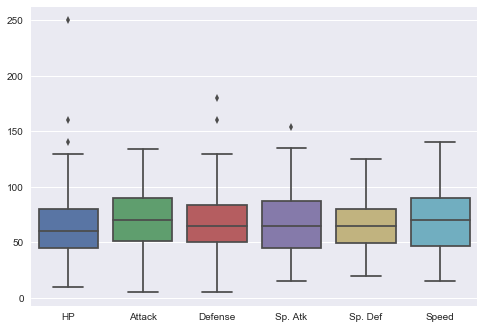

In [30]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

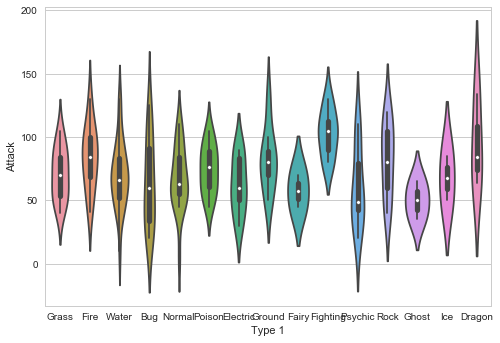

In [36]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [37]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

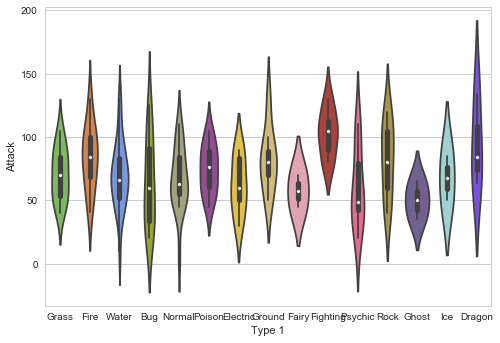

In [38]:
sns.violinplot(x='Type 1', y='Attack', data=df,palette=pkmn_type_colors)

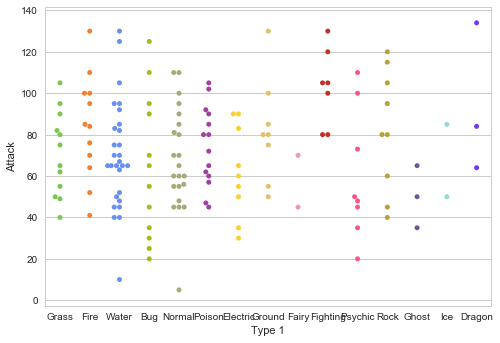

In [43]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

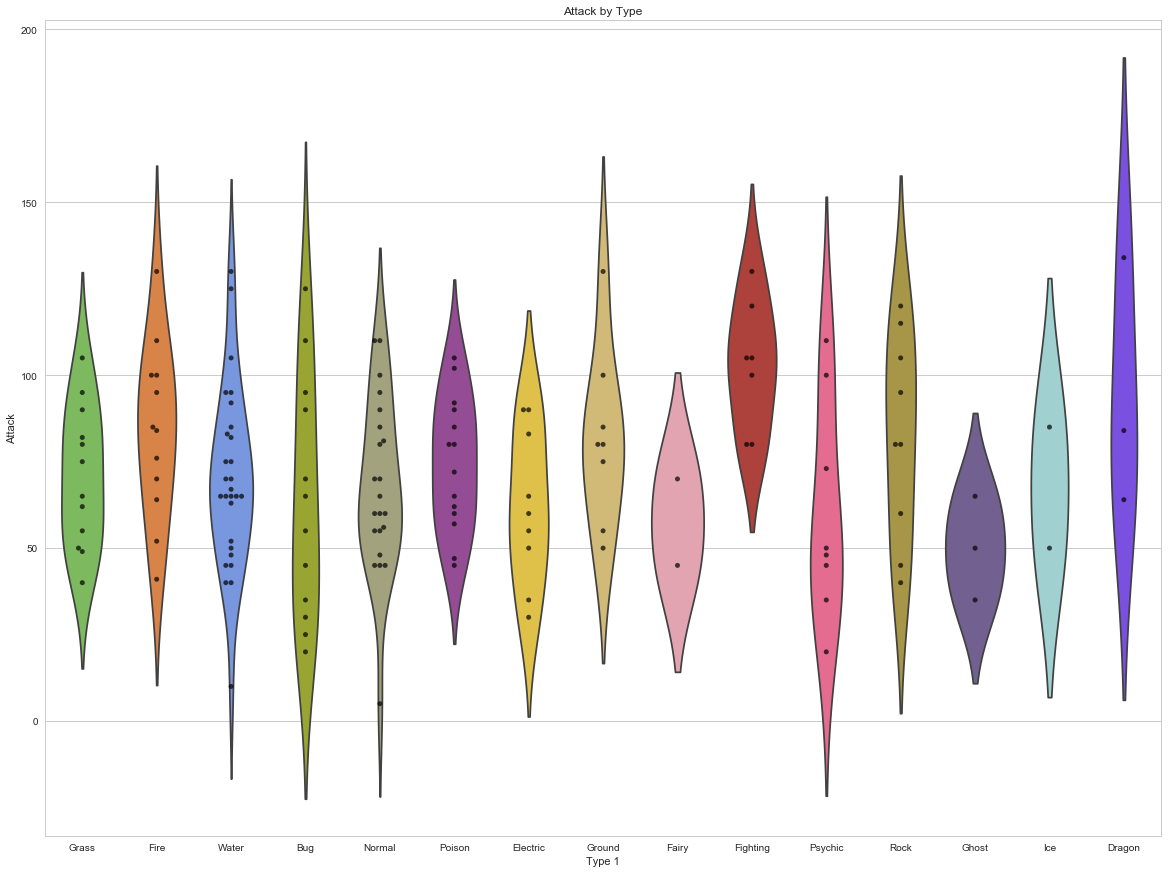

In [42]:
# Set figure size with matplotlib
plt.figure(figsize=(20,15))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [44]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


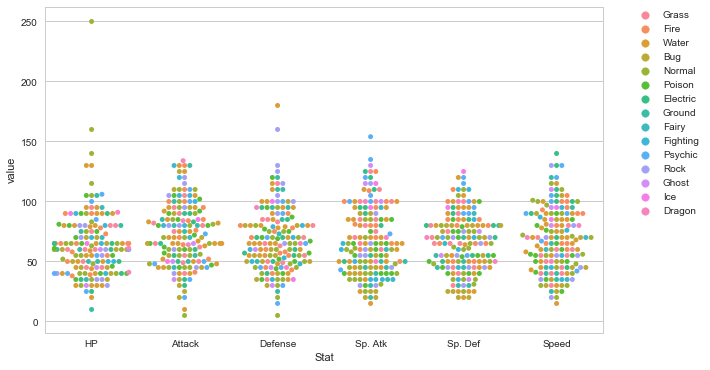

In [66]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')
# Without this legend comes on the plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

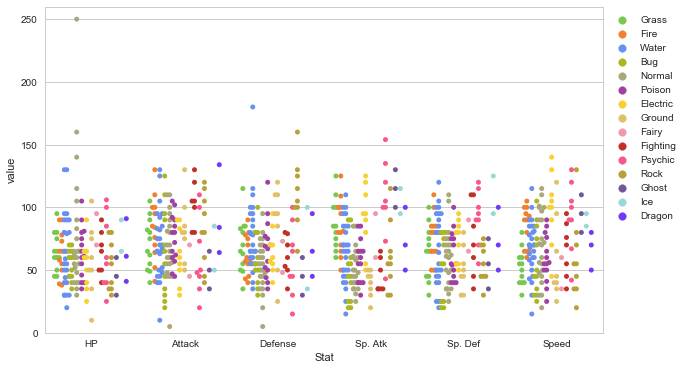

In [67]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

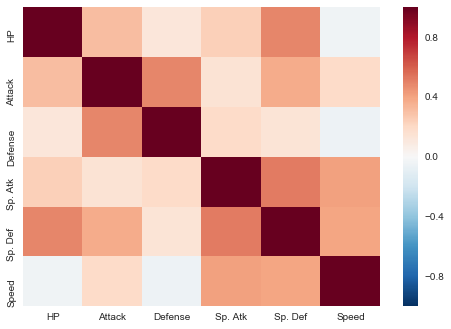

In [68]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

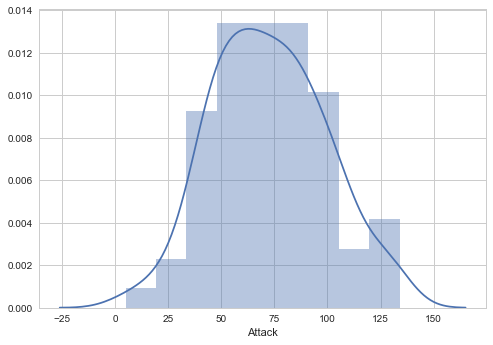

In [70]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

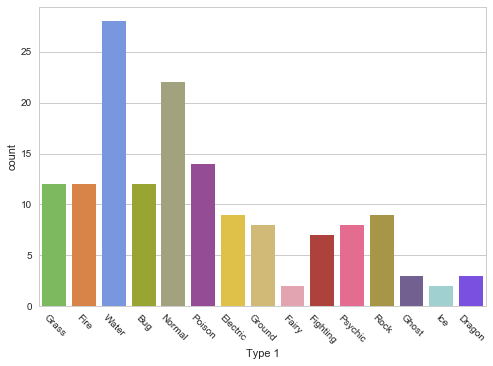

In [71]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

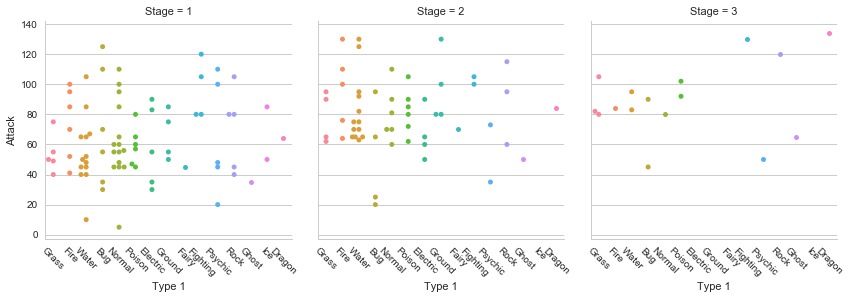

In [74]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

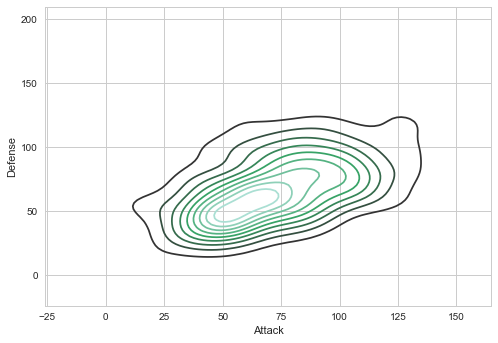

In [75]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

(0, 180)

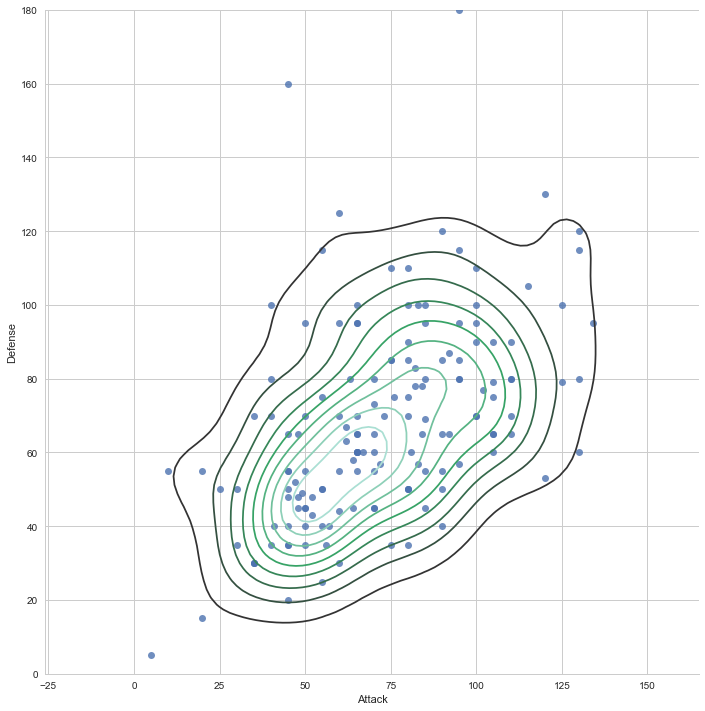

In [85]:
#Density overlayed on scatter
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False,aspect=1, size=10)
sns.kdeplot(df.Attack,df.Defense)
plt.ylim(0,180)

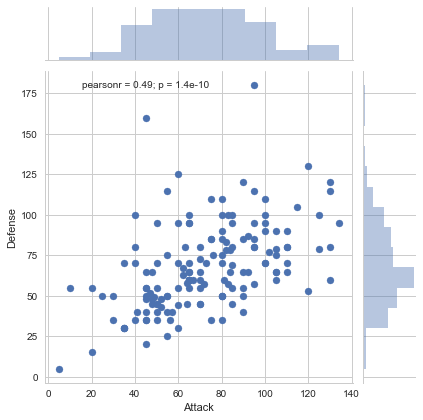

In [86]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

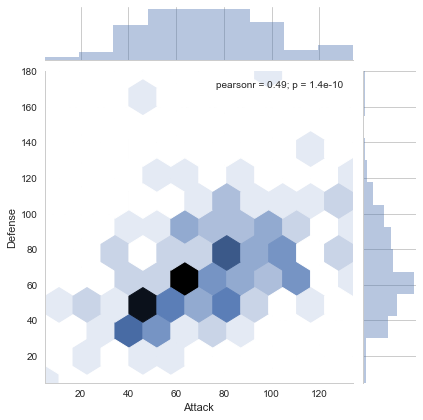

In [87]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df, kind='hex')